In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("exam.csv",header=None)
#print(df)

X=df[[0,1]].values
Y=df[[2]].values
X=(X-np.mean(X))/np.std(X)
print(Y.shape)

(100, 1)


In [3]:
ones=np.ones([Y.size,1])
X=np.concatenate((ones,X),axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=50,test_size=.3)
theta=np.matrix(np.zeros(3))

epoch=10

In [4]:
def hessian(X, theta,hypothesis):
    temp=[]
    for i in range(70):
        temp.append(0.25)
    Diagonal=np.diag(np.array(temp))
    temp = 1 - hypothesis
    s = np.matmul(X.T,Diagonal)
    prod = np.dot(s,X)
    
    return (prod / len(X))

def newton(X, Y, theta, epoch):
    for i in range(epoch):
        theta_T = np.transpose(theta)
        theta_Tx = np.matmul(X,theta_T)
        hypothesis = 1 / (1+(np.exp(-theta_Tx)))
        error = hypothesis - Y
        cost = (-1)*(np.log2(hypothesis))+(1-Y)*(np.log2(1-hypothesis))
        J = np.sum(cost) / len(Y)
        gradient=(error.T * X) /len(X)
        hess = hessian(X, theta,hypothesis)
        hess_inv= np.linalg.inv(hess)
        temp = gradient * hess_inv
        theta = theta - temp
    
    return theta

parameters=newton(x_train,y_train,theta,epoch)
print(parameters)


[[0.98497623 2.29873412 2.35071542]]


In [5]:
y_predict = np.matmul(x_test, parameters.transpose())
y_predict = 1 / (1+(np.exp(-y_predict)))
y_predict = np.where(y_predict >= 0.5,1,0)
y_predict = np.squeeze(y_predict)

count = 0
for i in range(len(y_predict)):
    if(y_predict[i] == y_test[i]):
        count = count+1
print("predictions out of 30 test points is ",count)
accuracy =  (count / len(y_predict)) * 100
print("Accuracy achieved=", accuracy, "%")

predictions out of 30 test points is  26
Accuracy achieved= 86.66666666666667 %


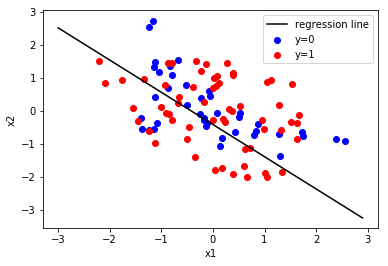

In [64]:
x0=[]
x1=[]
c=df[2]
for i in range(0,len(c)):
    if(c[i]==0):
        x0.append([df[0][i],df[1][i]])
    if(c[i]==1):
        x1.append([df[0][i],df[1][i]])

x0=np.array(x0)
x1=np.array(x1)
x0=(x0-np.mean(x0))/np.std(x0)
x1=(x1-np.mean(x1))/np.std(x1)
plt.scatter([x0[:,0]],[x0[:,1]],c='b',label='y=0')
plt.scatter([x1[:,0]],[x1[:,1]],c='r',label='y=1')
x3=np.arange(-3,3,0.1)
x4=-(parameters[0,0]+parameters[0,1]*x3)/parameters[0,2]
plt.plot(x3,x4,c='k',label='regression line')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()